<a href="https://colab.research.google.com/github/Sushree-2000/EDA-on-Play-Store-Apps-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df_PlayStore = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data sheets/Play Store Data.csv")

In [33]:
df_UserReview= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data sheets/User Reviews.csv")

In [34]:
df_PlayStore_copy = df_PlayStore.copy()
df_UserReview_copy = df_UserReview.copy()

##About playstore dataset

In [35]:
df_PlayStore_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
df_PlayStore_copy.shape

(10841, 13)

In [37]:
#variables of the dataset
df_PlayStore_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

###**Column Description**
App: Name of app

Category: Category of app

Rating: Total rating of the app

Reviews: Total number of reviews

Size: Size of the app(in MB as M, and KB as k)

Installs: Number of installs done for this app

Type: Type of app(paid version/free)

Price: Price of app(if it's a paid version app)

Content Rating: Maturity rating (for everyone/for teen/for adult)

Genres: A particular type or style

Last Updated: Last updated date of the app

Current Ver: Current version of the app

Android Ver: Android version of the app

In [38]:
df_PlayStore_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [39]:
df_PlayStore_copy.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Number of unique values of each column
df_PlayStore_copy.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

##DATA CLEANING OF PLAYSTORE DATASET

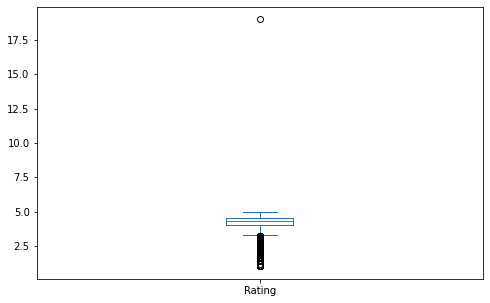

In [41]:
#Let's 1st apply box plot to our dataset to get an initial visualization
df_PlayStore_copy.plot(kind='box',figsize=(8,5))

###As 'Rating' is our only numerical column so box plot is plotted for that column only.
###Maximum range = 5.0
###From the plot we can see that one of the value for Ratings is exceeds the highest range, so let's find out and drop that value.

In [42]:
#Find the row where RAting value exceeds the highest rate 
df_PlayStore_copy[df_PlayStore_copy['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [43]:
#Drop the row
df_PlayStore_copy.drop(df_PlayStore_copy[df_PlayStore_copy['Rating']>5].index,axis=0,inplace=True)

##Check for the null values and duplicate values and remove them

###In this playstore data frame 'Reviews' , 'Size' , 'Installs' , 'Price' contain numerical typed values but in the form of object type. 
###So, 1st we need to convert these in numerical typed values and then remove the null values from the entire data set.

####>> DROP THE NULL VALUES 

In [44]:
#Total number of null values in each column
df_PlayStore_copy.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [45]:
#Fill the null values of Rating column with it's mean value 
df_PlayStore_copy['Rating'].fillna(df_PlayStore_copy['Rating'].mean(),inplace=True)

In [46]:
#Drop the null values from the playstore dataset
df_PlayStore_copy = df_PlayStore_copy.dropna(axis=0)

In [47]:
#Drop the duplicate values
df_PlayStore_copy.drop_duplicates(subset = ['App'],keep='first',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [48]:
df_PlayStore_copy.shape

(9648, 13)

In [49]:
df_PlayStore_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


####>> CONVERT THE DATATYPES OF REQUIRED SERIESES

In [50]:
#Change the 'Reviews' series values to integer values
df_PlayStore_copy['Reviews'] = df_PlayStore_copy['Reviews'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
#Change the 'Size' series values from 'M'(mega byte) & 'k' (kilo byte) to bytes(in decimal) and the type from string to float
new_size=[]
for i in df_PlayStore_copy['Size']:
  if i=='Varies with device':
    i= 0.0
  elif 'M' in i:
    i=float(i.replace('M',''))*(10**6)   # 1mb = (1000**2)b=1000000 bytes (in decimal), 1mb =(1024**2)b=1024576 bytes(in binary)
  elif 'k' in i:
    i=float(i.replace('k',''))*(10**3)   # 1kb = 1000 bytes (in decimal), 1kb= 1024 bytes(in decimal)
  new_size.append(i)
df_PlayStore_copy['Size']=new_size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [52]:
#Check if any of the value of the series 'Size' remain 'string'
for i in df_PlayStore_copy['Size']:
  if type(i) != float:
    print(i)

In [53]:
#Function for conversion of string to numeric
def convert_str_to_int(s=None):
  if s is None:
    return 0
  a=''
  for i in s:
    if i in np.arange(10).astype(str):
      a=a+i
  if a=='':
    return 0
  return int(a)

In [54]:
#Change the datatype of 'Installs' seies from String to int
df_PlayStore_copy['Installs']=df_PlayStore_copy['Installs'].apply(lambda s:convert_str_to_int(s))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
#Change the datatype of 'Price' series from String to float
df_PlayStore_copy['Price']=df_PlayStore_copy['Price'].apply(lambda s : float(convert_str_to_int(s)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
#Let's again check the info of the data set to know if the data types of the serieses got changed or not
df_PlayStore_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [57]:
df_PlayStore_copy.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [58]:
df_PlayStore_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### >>Now our dataset has neither any duplicate nor any null values